In [1]:
import pandas as pd
from prepare import Prepare
from split_get_scale import SplitGetScale
pd.options.display.max_columns = 30

In [2]:
zillow = Prepare().wrangle_zillow()
zillow.head()

/Users/dragonzord/Documents/SchoolDocs/codeup-data-science/exercises/methodologies1/clustering/zillow_clustering/prepare.py:11: DtypeWarning: Columns (63) have mixed types.Specify dtype option on import or set low_memory=False.
  df = Acquire().get_zillow_data()


,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,region_id_county,region_id_zip,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,transaction_date,county
0,14297519,3.5,4,3100.0,6059,33634931.0,-117869207.0,4506.0,6.059063e+07,53571,1286,96978,1998,485713.0,1023282.0,2016,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Orange
1,17052889,1.0,2,1465.0,6111,34449266.0,-119281531.0,12647.0,6.111001e+07,13091,2061,97099,1967,88000.0,464000.0,2016,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Ventura
2,14186244,2.0,3,1243.0,6059,33886168.0,-117823170.0,8432.0,6.059022e+07,21412,1286,97078,1962,85289.0,564778.0,2016,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Orange
3,12177905,3.0,4,2376.0,6037,34245180.0,-118240722.0,13038.0,6.037300e+07,396551,3101,96330,1970,108918.0,145143.0,2016,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Los Angeles
4,10887214,3.0,3,1312.0,6037,34185120.0,-118414640.0,278581.0,6.037124e+07,12447,3101,96451,1964,73681.0,119407.0,2016,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Los Angeles


In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69519 entries, 0 to 77573
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   parcel_id                   69519 non-null  int64         
 1   bathroom_count              69519 non-null  float64       
 2   bedroom_count               69519 non-null  int64         
 3   home_size_square_feet       69519 non-null  float64       
 4   fips                        69519 non-null  int64         
 5   latitude                    69519 non-null  float64       
 6   longitude                   69519 non-null  float64       
 7   lot_size_square_feet        69519 non-null  float64       
 8   raw_census_tract_and_block  69519 non-null  float64       
 9   region_id_city              69519 non-null  int64         
 10  region_id_county            69519 non-null  int64         
 11  region_id_zip               69519 non-null  int64     

In [4]:
zillow.describe()

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,region_id_county,region_id_zip,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error
count,6.951900e+04,69519.000000,69519.000000,69519.000000,69519.000000,6.951900e+04,6.951900e+04,6.951900e+04,6.951900e+04,69519.000000,69519.000000,69519.000000,69519.000000,6.951900e+04,6.951900e+04,69519.0,6.951900e+04,69519.000000,6.951900e+04,69519.000000
mean,1.300584e+07,2.249356,3.007135,1727.633956,6049.314389,3.400278e+07,-1.181938e+08,2.765569e+04,6.049612e+07,33495.844906,2499.987975,96607.295933,1968.915390,1.794619e+05,4.640719e+05,2016.0,2.846099e+05,5659.040449,6.050221e+13,0.016529
std,2.125302e+06,0.906052,0.992973,852.057075,20.844831,2.680092e+05,3.607679e+05,1.191873e+05,2.068930e+05,46617.389683,814.618534,3835.076564,22.913068,1.753593e+05,4.544412e+05,0.0,3.270519e+05,5265.652640,1.615844e+12,0.165130
min,1.071186e+07,1.000000,1.000000,360.000000,6037.000000,3.333953e+07,-1.194753e+08,2.360000e+02,6.037101e+07,3491.000000,1286.000000,95982.000000,1878.000000,4.400000e+01,3.254000e+03,2016.0,1.610000e+02,19.920000,6.037101e+13,-4.655420
25%,1.154281e+07,2.000000,2.000000,1164.000000,6037.000000,3.380430e+07,-1.184092e+08,6.000000e+03,6.037312e+07,12447.000000,1286.000000,96206.000000,1953.000000,8.278050e+04,2.022560e+05,2016.0,8.201850e+04,2661.060000,6.037312e+13,-0.023755
50%,1.258838e+07,2.000000,3.000000,1505.000000,6037.000000,3.401320e+07,-1.181630e+08,7.313000e+03,6.037621e+07,25218.000000,3101.000000,96411.000000,1970.000000,1.333550e+05,3.536790e+05,2016.0,2.024460e+05,4365.350000,6.037621e+13,0.006553
75%,1.425481e+07,3.000000,4.000000,2046.000000,6059.000000,3.417461e+07,-1.179144e+08,1.066850e+04,6.059052e+07,45457.000000,3101.000000,96989.000000,1986.000000,2.122830e+05,5.603350e+05,2016.0,3.653875e+05,6751.755000,6.059052e+13,0.038128
max,1.629608e+08,10.000000,11.000000,7970.000000,6111.000000,3.481877e+07,-1.175723e+08,6.971010e+06,6.111009e+07,396556.000000,3101.000000,399675.000000,2016.000000,3.097672e+06,4.993132e+06,2016.0,4.847224e+06,61992.630000,4.830301e+14,3.394544


In [5]:
sgs = SplitGetScale()
train, validate, test = sgs.split(zillow)
train.head()

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,region_id_county,region_id_zip,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,transaction_date,county
13527,11770180,1.0,2,941.0,6037,34012117.0,-118247150.0,6338.0,6.037228e+07,12447,3101,95992,1909,32430.0,72079.0,2016,39649.0,1025.09,6.037228e+13,-0.091213,2017-03-01,Los Angeles
52447,10884378,3.0,3,1560.0,6037,34203300.0,-118430000.0,7313.0,6.037127e+07,12447,3101,96414,2007,166541.0,363890.0,2016,197349.0,4473.98,6.037127e+13,-0.031320,2017-06-30,Los Angeles
2559,11749839,1.0,5,2986.0,6037,34048146.0,-118311705.0,12490.0,6.037213e+07,12447,3101,96000,1921,43056.0,78654.0,2016,35598.0,1193.71,6.037213e+13,0.059301,2017-01-12,Los Angeles
33056,10906993,2.0,1,1271.0,6037,34151000.0,-118406000.0,19158.0,6.037143e+07,12447,3101,96449,1978,151657.0,469812.0,2016,318155.0,5630.53,6.037143e+13,-0.021502,2017-05-04,Los Angeles
63509,10903027,3.0,3,2043.0,6037,34160988.0,-118412064.0,5001.0,6.037125e+07,12447,3101,96452,1962,191127.0,312927.0,2016,121800.0,3887.88,6.037125e+13,0.048015,2017-08-03,Los Angeles


### Target is log_error = log(zestimate) - log(sale price)

### Visualization

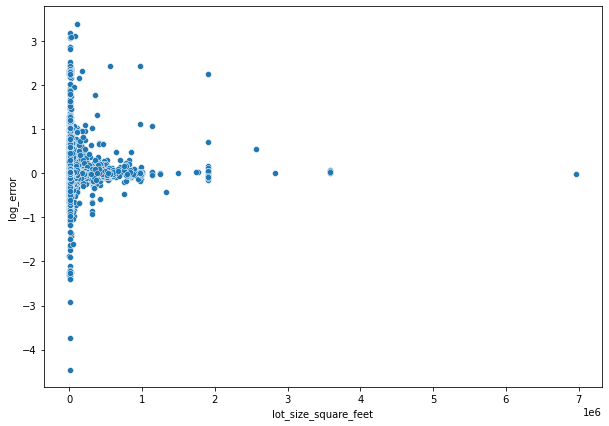

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.scatterplot(x="lot_size_square_feet", y="log_error", data=train);
# sns.histplot(x="log_error", data=train);

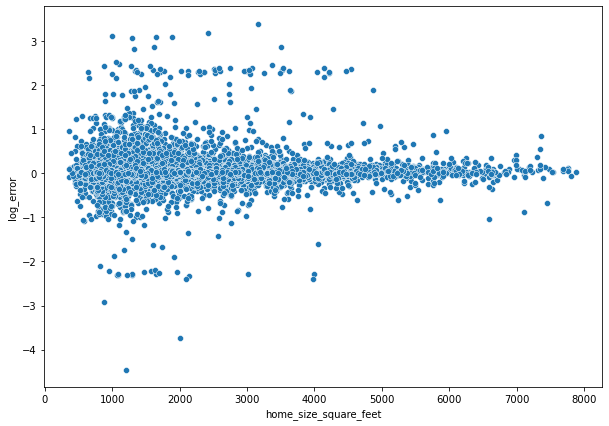

In [55]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="home_size_square_feet", y="log_error", data=train);

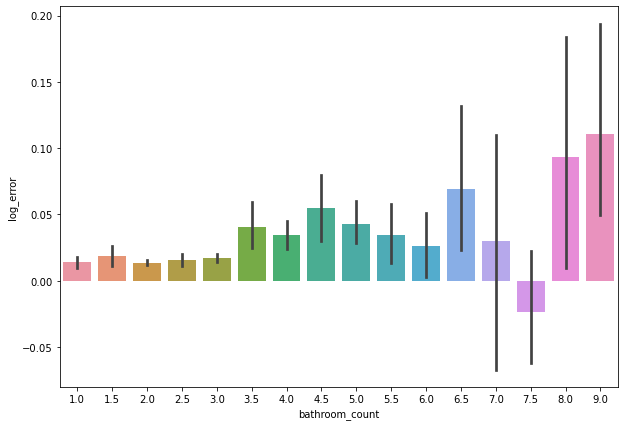

In [31]:
plt.figure(figsize=(10, 7))
sns.barplot(x="bathroom_count", y="log_error", data=train);

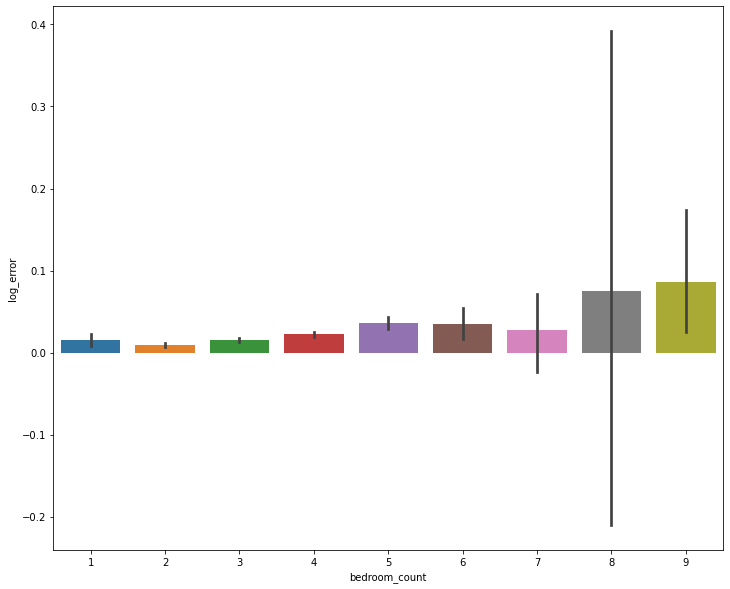

In [57]:
plt.figure(figsize=(12, 10))
sns.barplot(x="bedroom_count", y="log_error", data=train);

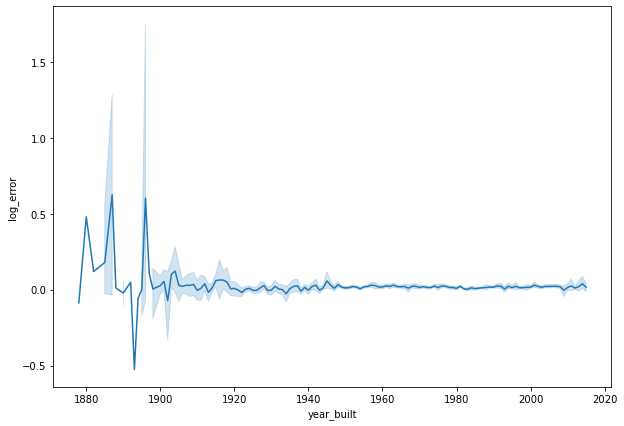

In [35]:
plt.figure(figsize=(10, 7))
sns.lineplot(x="year_built", y="log_error", data=train);

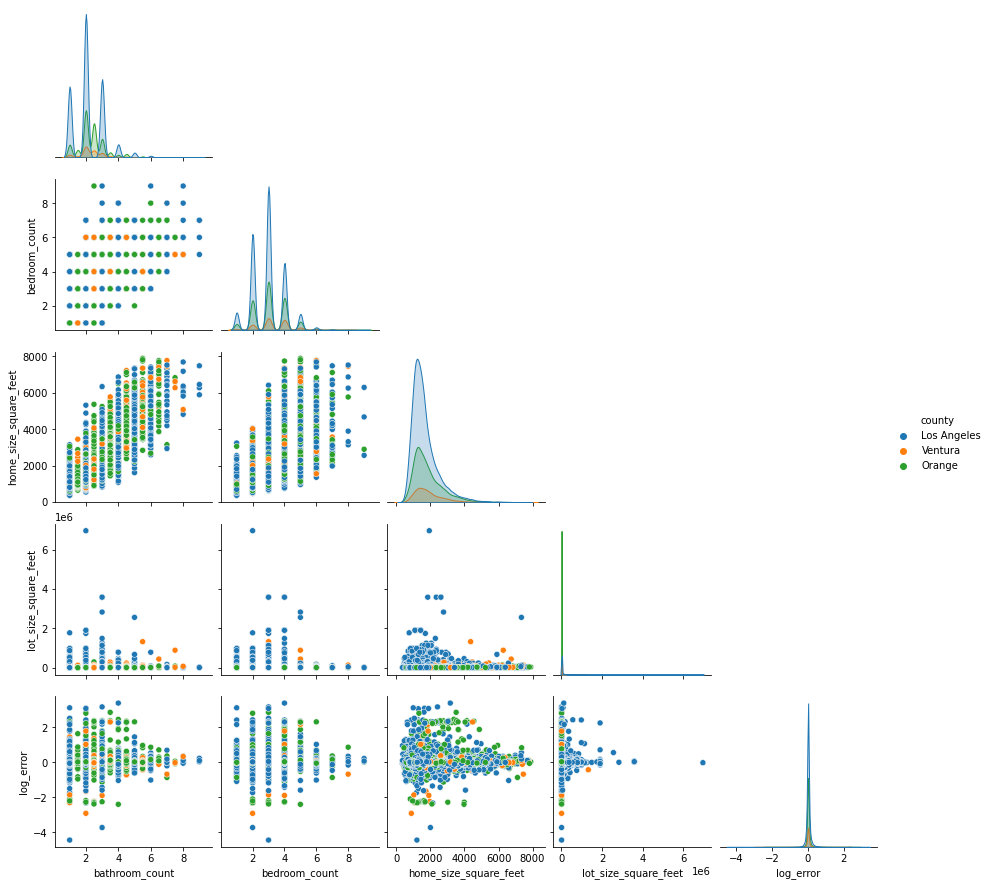

In [49]:
cols = ["bathroom_count", "bedroom_count", "home_size_square_feet", "lot_size_square_feet", "log_error"]
sns.pairplot(data=train, vars=cols, corner=True, hue="county");

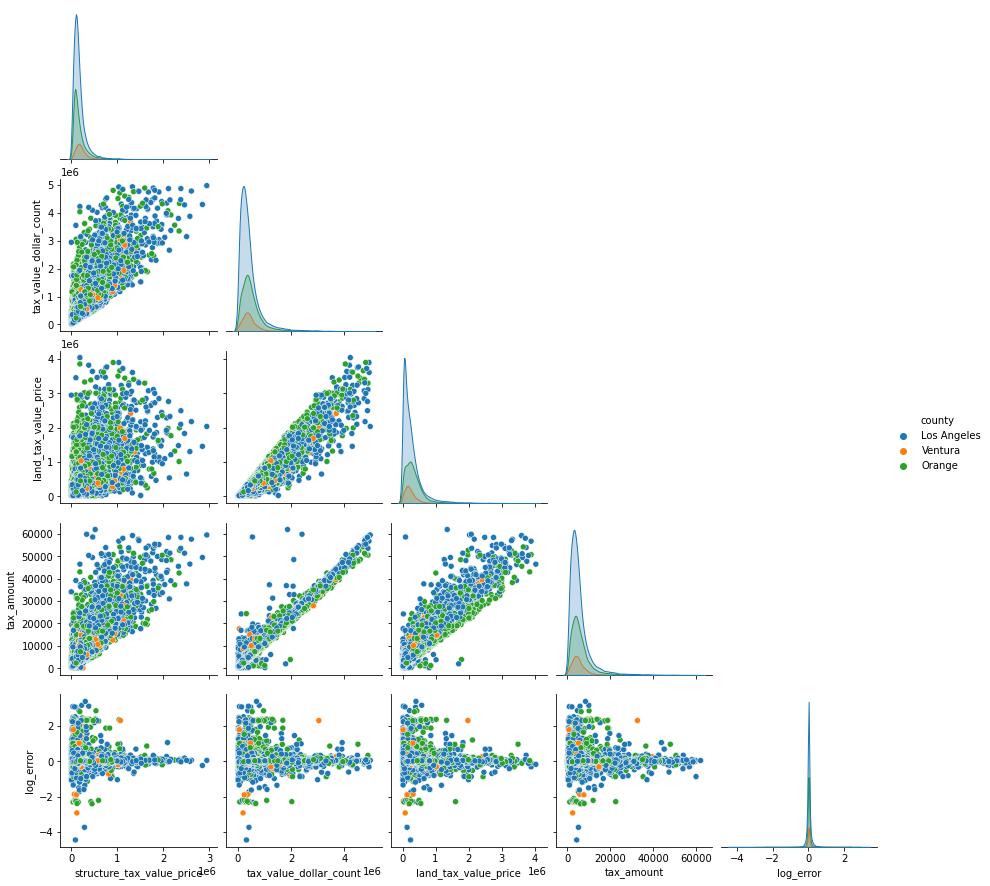

In [50]:
cols = ["structure_tax_value_price", "tax_value_dollar_count", "land_tax_value_price", "tax_amount", "log_error"]
sns.pairplot(data=train, vars=cols, corner=True, hue="county");

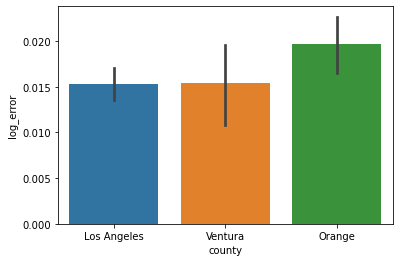

In [46]:
sns.barplot(x="county", y="log_error", data=train);

<AxesSubplot:xlabel='tax_value_dollar_count', ylabel='log_error'>

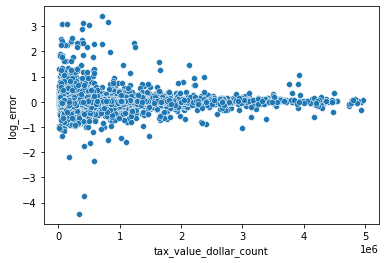

In [51]:
sns.scatterplot(x="tax_value_dollar_count", y="log_error", data=train[train["county"] == "Los Angeles"])

<AxesSubplot:xlabel='tax_value_dollar_count', ylabel='log_error'>

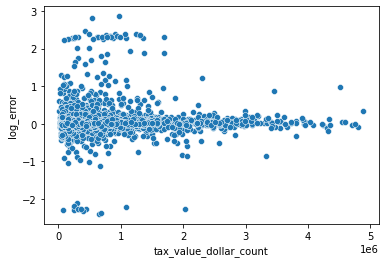

In [52]:
sns.scatterplot(x="tax_value_dollar_count", y="log_error", data=train[train["county"] == "Orange"])

<AxesSubplot:xlabel='tax_value_dollar_count', ylabel='log_error'>

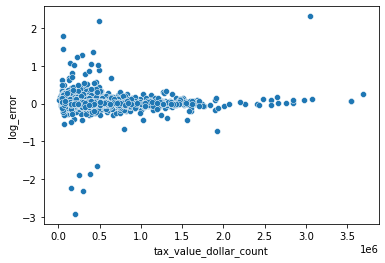

In [53]:
sns.scatterplot(x="tax_value_dollar_count", y="log_error", data=train[train["county"] == "Ventura"])

In [ ]:
ventura_train = train[train["county"] == "Ventura"]
la_train = train[train["county"] == "Los Angeles"]

In [63]:
print(ventura_train.log_error.mean())
print(la_train.log_error.mean())

0.015385847880080506
0.0153563100378671


In [64]:
print(ventura_train.log_error.std())
print(la_train.log_error.std())

0.14698628365011981
0.1597009930503621


In [65]:
print(ventura_train.log_error.var())
print(la_train.log_error.var())

0.021604967581273483
0.0255044071812718


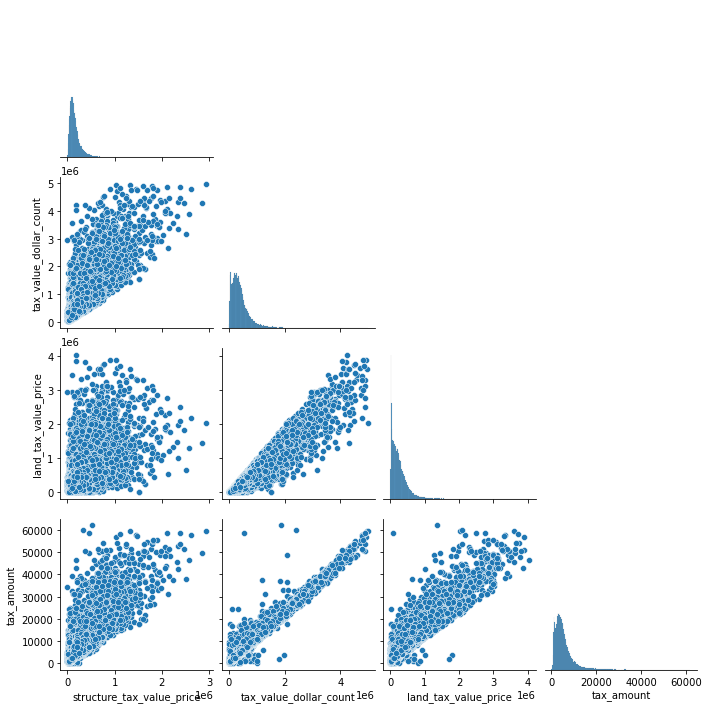

In [67]:
cols = ["structure_tax_value_price", "tax_value_dollar_count", "land_tax_value_price", "tax_amount"]
sns.pairplot(data=train, vars=cols, corner=True);

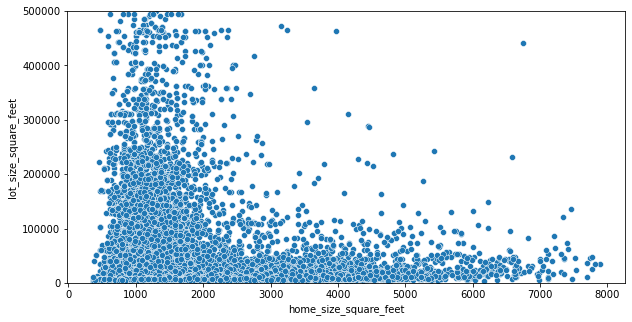

In [88]:
plt.figure(figsize=(10,5))
plt.ylim(0, 5e5)
sns.scatterplot(x="home_size_square_feet", y="lot_size_square_feet", data=train);

In [79]:
r, p = pearsonr(train.home_size_square_feet, train.lot_size_square_feet)
r, p

(-0.055623612786967175, 1.0206234469241229e-33)

### vizzes to include in report

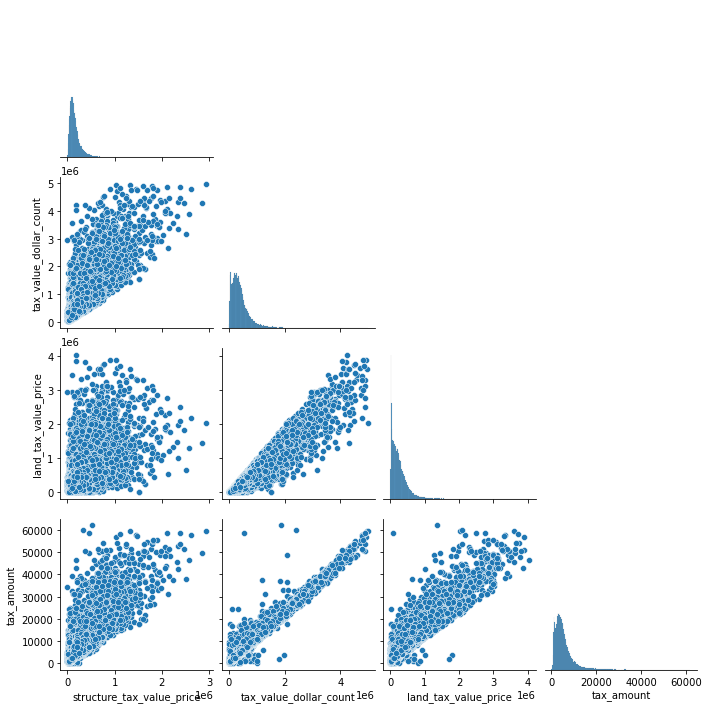

In [82]:
cols = ["structure_tax_value_price", "tax_value_dollar_count", "land_tax_value_price", "tax_amount"]
sns.pairplot(data=train, vars=cols, corner=True);

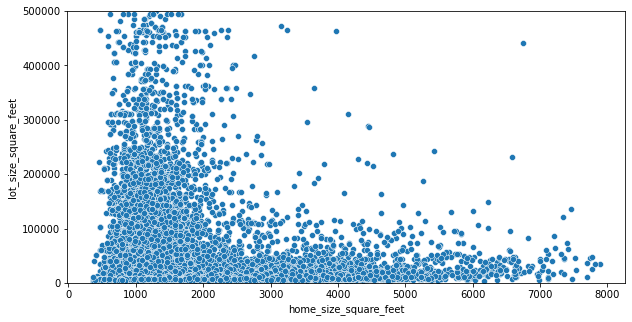

In [89]:
plt.figure(figsize=(10,5))
plt.ylim(0, 5e5)
sns.scatterplot(x="home_size_square_feet", y="lot_size_square_feet", data=train);

#### vizzes that line up with stat tests

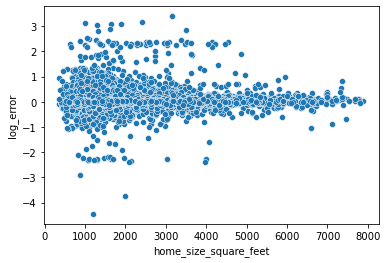

In [58]:
sns.scatterplot(x="home_size_square_feet", y="log_error", data=train);

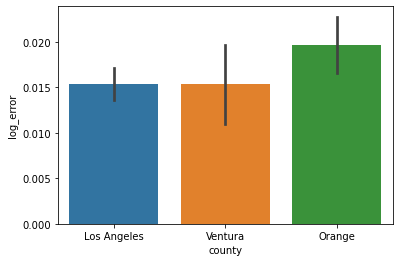

In [60]:
sns.barplot(x="county", y="log_error", data=train);

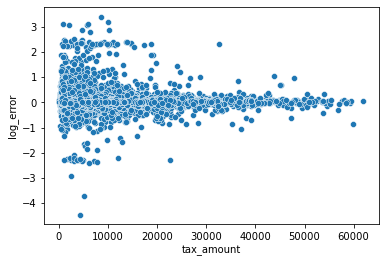

In [59]:
sns.scatterplot(x="tax_amount", y="log_error", data=train);